In [1]:
import numpy as np
import matplotlib.pyplot as plt
import khammash_repro

In [2]:
phi, L, sp = khammash_repro.datagen(n_traj=1, sp_per_traj=3)

100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


Validating Openloop Response

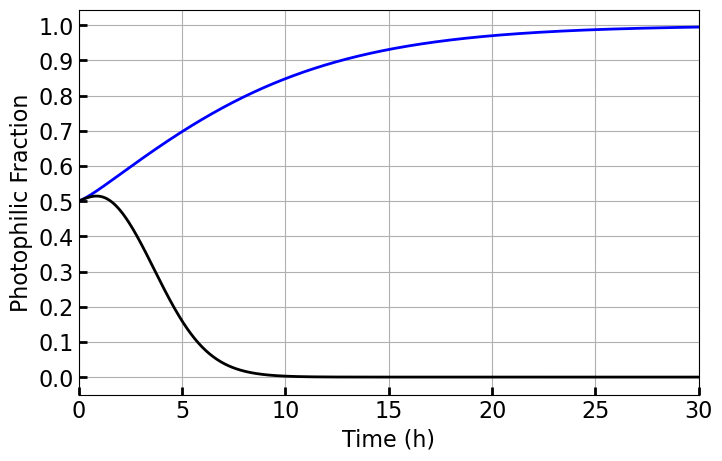

In [3]:
phi_p0 = 0.5
L_arr = np.array([800])
t_arr = np.array([30])

output_t_act, output_y_act = khammash_repro.integrate_OL(phi_p0, L_arr, t_arr)

L_arr = np.array([0])

output_t_deact, output_y_deact = khammash_repro.integrate_OL(phi_p0, L_arr, t_arr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(output_t_act, output_y_act[-1,:], color = 'blue', linewidth = 2, label = '800 arb units')
ax.plot(output_t_deact, output_y_deact[-1,:], color = 'black', linewidth = 2, label = '0 arb units')
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_xlabel('Time (h)', fontsize = 16)
ax.set_ylabel('Photophilic Fraction', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16, width=2, length=6, direction='in')
ax.set_xlim([0, 30])
ax.grid()

Validating Closed Loop Response

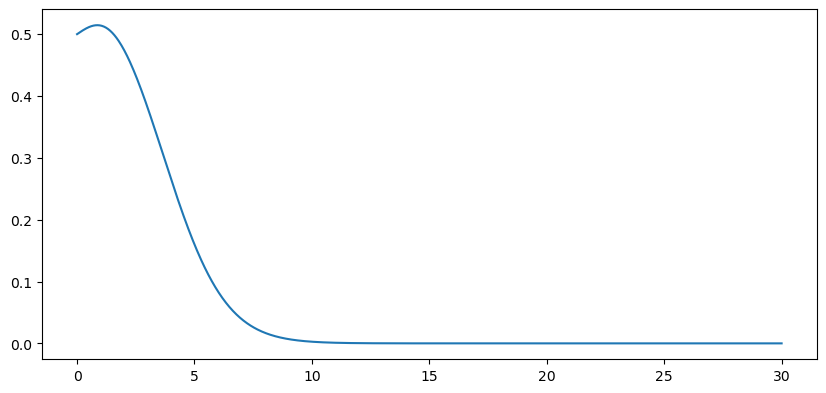

In [4]:
phi_p0 = 0.5
L_arr = np.array([0])
t_arr = np.array([30])

output_t, output_y = khammash_repro.integrate_OL(phi_p0, L_arr, t_arr)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(211)
ax.plot(output_t, output_y[-1,:])

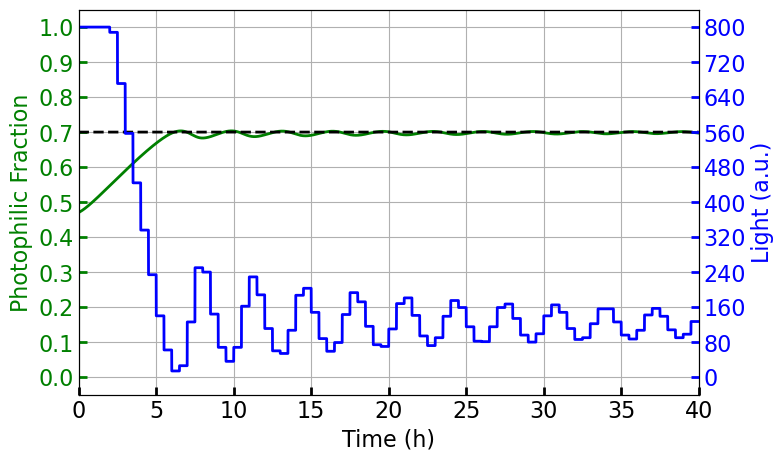

In [5]:
# def pid_pars(Kp=9.96358683,  Ki=0.3627385,  Kd=11.52560098,  Kbc=0.15180135):
#     return Kp, Ki, Kd, Kbc

phi_p0 = 0.47
L0 = 800

Kp = 5.9055e3 #/ 800
Ki = 3.0382 #/ 1
Kd = 2.3427e5 #/ 60
Kbc = 0.01

pid_par = (Kp, Ki, Kd, Kbc)

sp_arr = np.array([0.7])
t_arr = np.array([40])

output_t, output_y, output_L, output_sp = khammash_repro.integrate_CL(phi_p0, L0, pid_par, sp_arr, t_arr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(output_t, output_y[-1,:], color = 'green', linewidth = 2, label = 'Photophilic Fraction')
ax.plot(output_t, output_sp, color = 'black', linestyle='dashed', linewidth = 2, label = 'Setpoint')
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([0, np.sum(t_arr)])
ax.set_xlabel('Time (h)', fontsize = 16)
ax.set_ylabel('Photophilic Fraction', fontsize = 16, color = 'green')
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='green')
ax.tick_params(axis='x', which='major', labelsize=16, width=2, length=6, direction='in')
ax.grid()

ax2 = ax.twinx()
ax2.plot(output_t, output_L, color = 'blue', linewidth = 2, label = 'Light')
ax2.set_ylim([-40, 840])
ax2.set_yticks([0, 80, 160, 240, 320, 400, 480, 560, 640, 720, 800])
ax2.set_ylabel('Light (a.u.)', fontsize = 16, color = 'blue')
ax2.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='blue')


# ax = fig.add_subplot(212)
# ax.plot(output_t, output_L, color = 'green', linewidth = 2, label = 'Light')
# ax.set_xlim([0, np.sum(t_arr)])
# ax.set_ylabel('Light (a.u.)', fontsize = 16)
# ax.set_xlabel('Time (h)', fontsize = 16)
# ax.tick_params(axis='both', which='major', labelsize=16, width=2, length=6, direction='in')

plt.subplots_adjust(wspace=0, hspace=0)

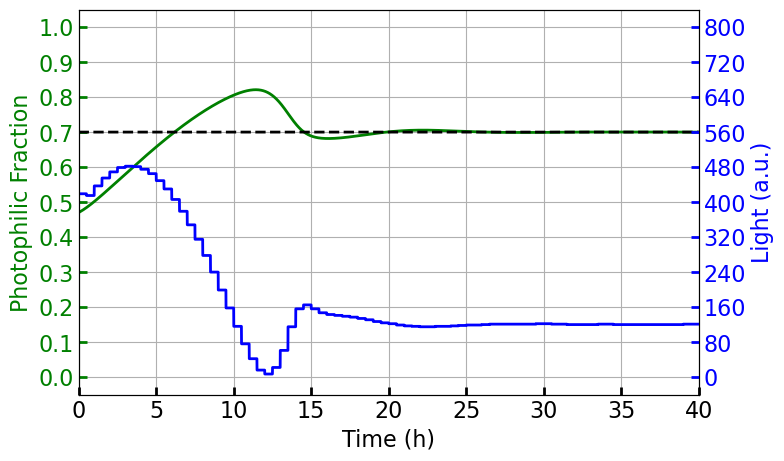

In [6]:
# def pid_pars(Kp=9.96358683,  Ki=0.3627385,  Kd=11.52560098,  Kbc=0.15180135):
#     return Kp, Ki, Kd, Kbc

phi_p0 = 0.47
L0 = 800

Kp = 1.5327e3 #/ 800
Ki = 9.6743 / 1
Kd = 9.5689e4 #/ 800 / 60
Kbc = 0.01

pid_par = (Kp, Ki, Kd, Kbc)

sp_arr = np.array([0.7])
t_arr = np.array([40])

output_t, output_y, output_L, output_sp = khammash_repro.integrate_CL(phi_p0, L0, pid_par, sp_arr, t_arr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(output_t, output_y[-1,:], color = 'green', linewidth = 2, label = 'Photophilic Fraction')
ax.plot(output_t, output_sp, color = 'black', linestyle='dashed', linewidth = 2, label = 'Setpoint')
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([0, np.sum(t_arr)])
ax.set_xlabel('Time (h)', fontsize = 16)
ax.set_ylabel('Photophilic Fraction', fontsize = 16, color = 'green')
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='green')
ax.tick_params(axis='x', which='major', labelsize=16, width=2, length=6, direction='in')
ax.grid()

ax2 = ax.twinx()
ax2.plot(output_t, output_L, color = 'blue', linewidth = 2, label = 'Light')
ax2.set_ylim([-40, 840])
ax2.set_yticks([0, 80, 160, 240, 320, 400, 480, 560, 640, 720, 800])
ax2.set_ylabel('Light (a.u.)', fontsize = 16, color = 'blue')
ax2.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='blue')

plt.subplots_adjust(wspace=0, hspace=0)

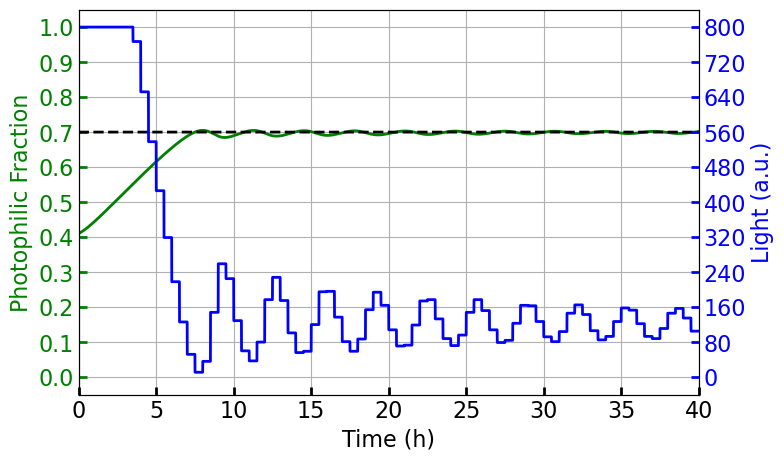

In [7]:
# def pid_pars(Kp=9.96358683,  Ki=0.3627385,  Kd=11.52560098,  Kbc=0.15180135):
#     return Kp, Ki, Kd, Kbc

phi_p0 = 0.41
L0 = 800

Kp = 5.9055e3 #/ 800
Ki = 3.0382 #/ 1
Kd = 2.3427e5 #/ 60
Kbc = 0.01

pid_par = (Kp, Ki, Kd, Kbc)

sp_arr = np.array([0.7])
t_arr = np.array([40])

output_t, output_y, output_L, output_sp = khammash_repro.integrate_CL(phi_p0, L0, pid_par, sp_arr, t_arr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(output_t, output_y[-1,:], color = 'green', linewidth = 2, label = 'Photophilic Fraction')
ax.plot(output_t, output_sp, color = 'black', linestyle='dashed', linewidth = 2, label = 'Setpoint')
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([0, np.sum(t_arr)])
ax.set_xlabel('Time (h)', fontsize = 16)
ax.set_ylabel('Photophilic Fraction', fontsize = 16, color = 'green')
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='green')
ax.tick_params(axis='x', which='major', labelsize=16, width=2, length=6, direction='in')
ax.grid()

ax2 = ax.twinx()
ax2.plot(output_t, output_L, color = 'blue', linewidth = 2, label = 'Light')
ax2.set_ylim([-40, 840])
ax2.set_yticks([0, 80, 160, 240, 320, 400, 480, 560, 640, 720, 800])
ax2.set_ylabel('Light (a.u.)', fontsize = 16, color = 'blue')
ax2.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='blue')

plt.subplots_adjust(wspace=0, hspace=0)

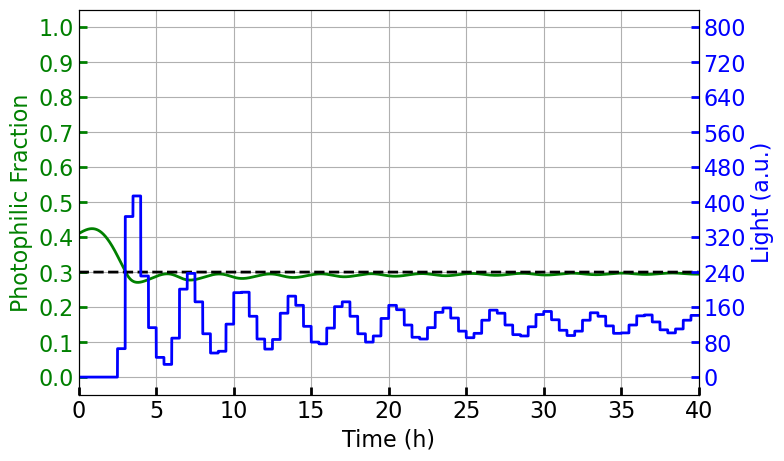

In [8]:
# def pid_pars(Kp=9.96358683,  Ki=0.3627385,  Kd=11.52560098,  Kbc=0.15180135):
#     return Kp, Ki, Kd, Kbc

phi_p0 = 0.41
L0 = 800

Kp = 5.9055e3 #/ 800
Ki = 3.0382 #/ 1
Kd = 2.3427e5 #/ 60
Kbc = 0.01

pid_par = (Kp, Ki, Kd, Kbc)

sp_arr = np.array([0.3])
t_arr = np.array([40])

output_t, output_y, output_L, output_sp = khammash_repro.integrate_CL(phi_p0, L0, pid_par, sp_arr, t_arr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(output_t, output_y[-1,:], color = 'green', linewidth = 2, label = 'Photophilic Fraction')
ax.plot(output_t, output_sp, color = 'black', linestyle='dashed', linewidth = 2, label = 'Setpoint')
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([0, np.sum(t_arr)])
ax.set_xlabel('Time (h)', fontsize = 16)
ax.set_ylabel('Photophilic Fraction', fontsize = 16, color = 'green')
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='green')
ax.tick_params(axis='x', which='major', labelsize=16, width=2, length=6, direction='in')
ax.grid()

ax2 = ax.twinx()
ax2.plot(output_t, output_L, color = 'blue', linewidth = 2, label = 'Light')
ax2.set_ylim([-40, 840])
ax2.set_yticks([0, 80, 160, 240, 320, 400, 480, 560, 640, 720, 800])
ax2.set_ylabel('Light (a.u.)', fontsize = 16, color = 'blue')
ax2.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='blue')

plt.subplots_adjust(wspace=0, hspace=0)

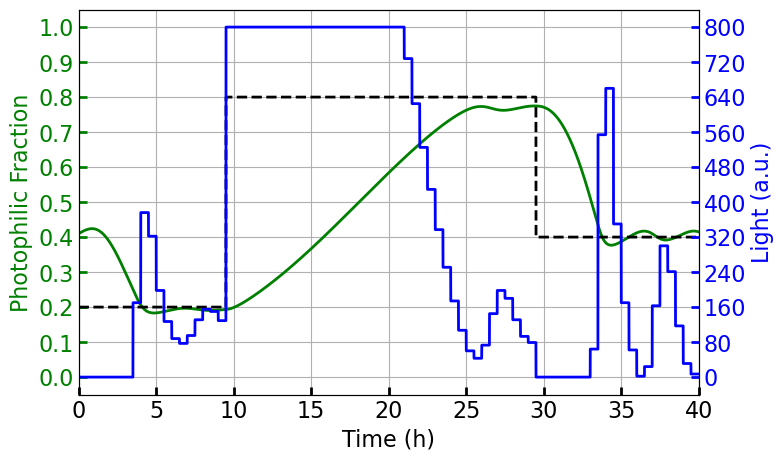

In [10]:
# def pid_pars(Kp=9.96358683,  Ki=0.3627385,  Kd=11.52560098,  Kbc=0.15180135):
#     return Kp, Ki, Kd, Kbc

phi_p0 = 0.41
L0 = 800

Kp = 5.9055e3 #/ 800
Ki = 3.0382 #/ 1
Kd = 2.3427e5 
Kbc = 0.01

pid_par = (Kp, Ki, Kd, Kbc)

sp_arr = np.array([0.2, 0.8, 0.4])
t_arr = np.array([10,20,10])

output_t, output_y, output_L, output_sp = khammash_repro.integrate_CL(phi_p0, L0, pid_par, sp_arr, t_arr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(output_t, output_y[-1,:], color = 'green', linewidth = 2, label = 'Photophilic Fraction')
ax.plot(output_t, output_sp, color = 'black', linestyle='dashed', linewidth = 2, label = 'Setpoint')
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([0, np.sum(t_arr)])
ax.set_xlabel('Time (h)', fontsize = 16)
ax.set_ylabel('Photophilic Fraction', fontsize = 16, color = 'green')
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='green')
ax.tick_params(axis='x', which='major', labelsize=16, width=2, length=6, direction='in')
ax.grid()

ax2 = ax.twinx()
ax2.plot(output_t, output_L, color = 'blue', linewidth = 2, label = 'Light')
ax2.set_ylim([-40, 840])
ax2.set_yticks([0, 80, 160, 240, 320, 400, 480, 560, 640, 720, 800])
ax2.set_ylabel('Light (a.u.)', fontsize = 16, color = 'blue')
ax2.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='blue')

plt.subplots_adjust(wspace=0, hspace=0)

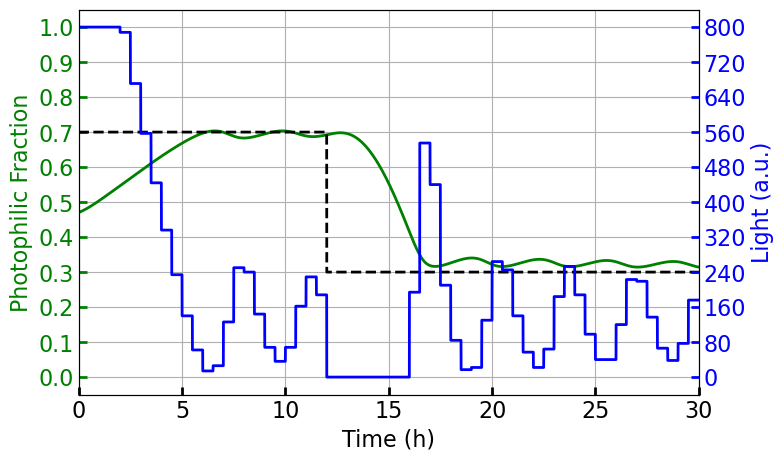

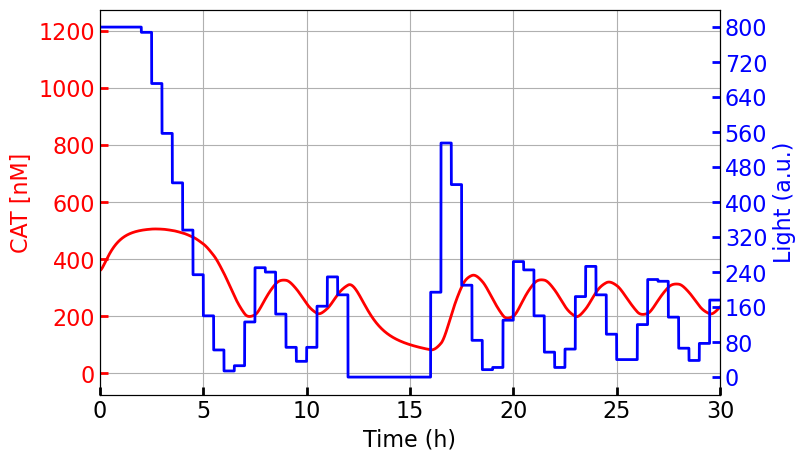

In [11]:
# def pid_pars(Kp=9.96358683,  Ki=0.3627385,  Kd=11.52560098,  Kbc=0.15180135):
#     return Kp, Ki, Kd, Kbc

phi_p0 = 0.47
L0 = 800

Kp = 5.9055e3 #/ 800
Ki = 3.0382 #/ 1
Kd = 2.3427e5 
Kbc = 0.01

pid_par = (Kp, Ki, Kd, Kbc)

sp_arr = np.array([0.7, 0.3])
t_arr = np.array([12.5, 30-12.5])

output_t, output_y, output_L, output_sp = khammash_repro.integrate_CL(phi_p0, L0, pid_par, sp_arr, t_arr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(output_t, output_y[-1,:], color = 'green', linewidth = 2, label = 'Photophilic Fraction')
ax.plot(output_t, output_sp, color = 'black', linestyle='dashed', linewidth = 2, label = 'Setpoint')
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([0, np.sum(t_arr)])
ax.set_xlabel('Time (h)', fontsize = 16)
ax.set_ylabel('Photophilic Fraction', fontsize = 16, color = 'green')
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='green')
ax.tick_params(axis='x', which='major', labelsize=16, width=2, length=6, direction='in')
ax.grid()

ax2 = ax.twinx()
ax2.plot(output_t, output_L, color = 'blue', linewidth = 2, label = 'Light')
ax2.set_ylim([-40, 840])
ax2.set_yticks([0, 80, 160, 240, 320, 400, 480, 560, 640, 720, 800])
ax2.set_ylabel('Light (a.u.)', fontsize = 16, color = 'blue')
ax2.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='blue')

########################################################

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(output_t, output_y[2,:], color = 'red', linewidth = 2, label = 'CAT [nM]')
ax.set_ylim([-75, 1275])
ax.set_xlim([0, np.sum(t_arr)])
ax.set_xlabel('Time (h)', fontsize = 16)
ax.set_ylabel('CAT [nM]', fontsize = 16, color = 'red')
# ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='red')
ax.tick_params(axis='x', which='major', labelsize=16, width=2, length=6, direction='in')
ax.grid()

ax2 = ax.twinx()
ax2.plot(output_t, output_L, color = 'blue', linewidth = 2, label = 'Light')
ax2.set_ylim([-40, 840])
ax2.set_yticks([0, 80, 160, 240, 320, 400, 480, 560, 640, 720, 800])
ax2.set_ylabel('Light (a.u.)', fontsize = 16, color = 'blue')
ax2.tick_params(axis='y', which='major', labelsize=16, width=2, length=6, direction='in', colors='blue')

plt.subplots_adjust(wspace=0, hspace=0)

In [12]:
from khammash_repro import ode_fun

y0_test = np.array([1500,80,400,0.5])
L = 400
print(ode_fun(0, y0_test, L))

[ 8.02862174e+00  1.47017048e+00 -1.41267249e+00  5.38397958e-04]
